This notebook walks through the creation of Frequency Differences in Arrival/Time Difference in Arrival (FDOA/TDOA) plots for one baseline of a Deployable Low-Band Ionosphere and Transient Experiment (DLITE) array. DLITE is a four-element array that observes below the FM radio band at 35-45 MHz. FDOA/TDOA plots are visibility plots, allowing us to pick out individual bright sources and track their movement. Sources of particular interest at the radio bright A-Team sources (Cygnus A, Cassiopeia A, Virgo A, Taurus A, Hercules A, and Hydra A) and the Sun.

In this notebook, we will use data taken by a DLITE array in Montville, Ohio on the day of the 2024 Total Solar Eclipse. We will construct FDOA/TDOA plots, label the A Team sources and the Sun, and create an animation of the low-frequency radio sky on the day of the eclipse. Additionally, we will plot the intensity of the Sun over the day of the eclipse. Although there is additional processing needed to isolate the Sun for more accurate estimations, the overall behavior of the low-frequency radio solar eclipse can still be seen.


The data are stored in a Google Drive, which you must connect your Google Notebook to. This drive also contains data from the day before and the day after the eclipse, as well as multiple processing scripts.

In [11]:
## Allows for access to Google Drive
from google.colab import drive
drive.mount('/content/drive/')

## Moves you into the Google Drive folder where data and processing scripts are stored.
## Ensure that the path matches where you have uploaded the files.

%cd /content/drive/My Drive/Colab Notebooks/DLITE




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/DLITE


In [2]:
##brings in Python packages needed in this tutorial

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation, writers
from matplotlib import animation, rc

We can use Astropy to open out .fits files for for use. These .fits files have two layers, the first being a data block and the second being a labeled table of values such as the location of flagged objects.

Our first image can then be created from the data block, which is a 4D data cube with both telescope polarizations, all time steps, and the FDOA and TDOA values for all timesteps and polarizations. The data cube is in the format [polarization (x = 0, y = 1), time step, FDOA, TDOA]. Using ":" calls all elements in the arrays.

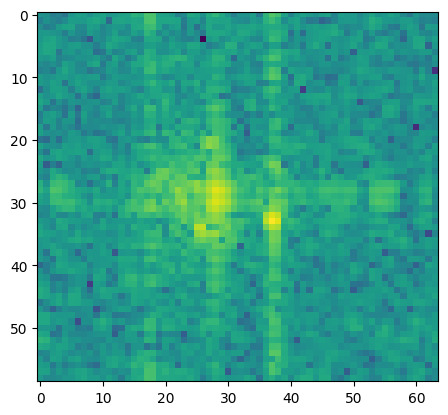

In [3]:
##uses astropy to open the .fits file created in the last step

hdul = fits.open('DLITE-OH-2024-04-08T000001.fits')

##get the data block
image_block = hdul[0].data

##isolate first image, [polarization (x = 0, y = 1), time step, FDOA, TDOA]

first_image = image_block[0,0, :, :]



plt.imshow(first_image)
plt.show()

In this next section, we will use elements from the second layer of the fits file. All of the columns contained in this layer are listed below, but we are specifically interested in columns 5 and 6, as they give us the pixel location in our FDOA/TDOA plot of each of the A-Team sources (in order: 'Cyg A',' Cas A',' Vir A',' Tau A',' Her A', 'Hyd A'), and columns 9 and 10, which gives us the pixel location of the Sun on the FDOA plot.


Column 0: tstamp - UNIX time stamp (seconds since January 1, 1970).

Column 1: ut - Universal time (hours).

Column 2: lst - Local sidereal time (hours).

Column 3: el_ateam - Elevation of bright “A-Team” sources as a six-element array per row (degrees).

Column 4: az_ateam - Azimuth (clockwise from north) of bright “A-Team” sources as a six-element array per row (degrees).

Column 5: x_ateam - TDOA pixel number within the corresponding TDOA/FDOA image for each A Team source as a six-element array per row.

Column 6: y_ateam -  FDOA pixel number within the corresponding TDOA/FDOA image for each ATeam source as a six-element array per row.

Column 7: el_sun -  Elevation of the Sun (degrees).

Column 8: az_sun -  Azimuth (clockwise from north) of the Sun (degrees).

Column 9: x_sun -  TDOA pixel number within the corresponding TDOA/FDOA image for the Sun.

Column 10: y_sun - FDOA pixel number within the corresponding TDOA/FDOA image for the Sun.

Column 11: flux_ateam_x - Intensity of each A-Team source from the X (north/south) linear polarization feed as a six-element array per row (Jy).

Column 12: flux_ateam_y -  Intensity of each A-Team source from the Y (east/west) linear polarization feed as a six-element array per row (Jy).

Column 13: sigma_ateam_x -  1-sigma intensity variation of each A-Team source from the Xpolarization feed as a six-element array per row (Jy).

Column 14: sigma_ateam_y -  1-sigma intensity variation of each A-Team source from the Ypolarization feed as a six-element array per row (Jy).

Column 15: plat_ateam - The latitude of the location where the line of sight intersects the ionosphere at an altitude of 300 km for each A-Team source as a six-element array per row.

Column 16: plon_ateam -  The longitude of the location where the line of sight intersects the ionosphere at an altitude of 300 km for each A-Team source as a six-element array per row.

Column 17: nsys_x - System noise for an integration time of one minute from the X-polarization feed (Jy).

Column 18: nsys_y -  System noise for an integration time of one minute from the Y-polarization feed (Jy).

Column 19: ckl_x - CkL irregularity strength parameter from the X-polarization feed (MKS units).

Column 20: ckl_y -  CkL irregularity strength parameter from the Y-polarization feed (MKS units).

Column 21: ckl_ateam_x -  CkL irregularity strength parameter per A-Team source from the Xpolarization feed as a six-element array per row (MKS units).

Column 22: ckl_ateam_y -  CkL irregularity strength parameter per A-Team source from the Ypolarization feed as a six-element array per row (MKS units).






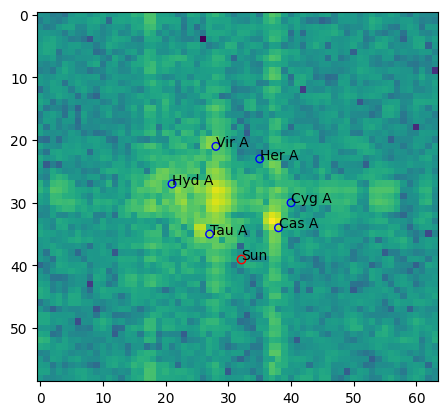

In [4]:
##capture the second layer of the .fits file
info_block = hdul[1].data


## the .field(collumn)[row] command allows us to capture the arrays with the A Team and Sun pixel locations
x_a_team_0 = info_block.field(5)[0]
y_a_team_0 = info_block.field(6)[0]

x_sun_0 = info_block.field(9)[0]
y_sun_0 = info_block.field(10)[0]


## Using our location arrays and the array of names used below, we can plot the location of the A-Team sources and the Sun
## with the names of each source marked on the plot using a .scatter to plot the points and .annoatte to add the labels

source_names = ['Cyg A','Cas A','Vir A','Tau A','Her A','Hyd A']

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_a_team_0, y_a_team_0, s=30, facecolors='none', edgecolors='b')

# Add labels using annotate()
for i, label in enumerate(source_names):
    ax.annotate(label, (x_a_team_0[i], y_a_team_0[i]))

plt.plot(x_sun_0, y_sun_0, marker='o', fillstyle='none', color = "red")
ax.annotate("Sun", (x_sun_0, y_sun_0))
plt.imshow(first_image)
plt.show()






We can now use the matplotlib.animation package to iterate through the entire observation, plot the same information as in the last cell, and turn it into an animation of the sky during our observations.

In [5]:


fig = plt.figure()
ax = plt.axes()

a= image_block[0,0, :, :]

im=plt.imshow(a,interpolation='none')




# initialization function: plot the background of each frame, in this case, the FDOA/TDOA plot for our first timestep

def init():

    im.set_data(image_block[0,0, :, :])

    return [im]

# animation function.  This is called sequentially
def animate(i):

    fig.clear() ##this command is used to make sure the source markers are removed at each iteration
    a =  image_block[i,0, :, :]

    plt.imshow(a)
    ##plot source locations and label as done in the previous static plot

    x_a_team_0 = info_block.field(5)[i]
    y_a_team_0 = info_block.field(6)[i]

    x_sun_0 = info_block.field(9)[i]
    y_sun_0 = info_block.field(10)[i]

    source_names = ['Cyg A','Cas A','Vir A','Tau A','Her A','Hyd A']
    scatter = plt.scatter(x_a_team_0, y_a_team_0, s=30, facecolors='none', edgecolors='b')

    for i, label in enumerate(source_names):
        plt.annotate(label, (x_a_team_0[i], y_a_team_0[i]))

    sun = plt.plot(x_sun_0, y_sun_0, marker='o', fillstyle='none', color = "red")
    plt.annotate("Sun", (x_sun_0, y_sun_0))

    im.set_data(a)


    a =  image_block[i,0, :, :]


    return [im]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=68, interval=20, blit=False)

##save the animation to the google drive
anim.save('basic_animation.mp4', fps=1, extra_args=['-vcodec', 'libx264'])


rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

During the eclipse, we were interested to see how the radio emission at our observing frequency of 42 MHz diminished during the optical eclipse. Below, we plot the pixel brightness of the Sun across the day. For actual measurements, the data must be further processed to remove emissions from the other radio-bright objects in the sky, but we still see some general decrease in pixel brightness during the time of the optical eclipse.

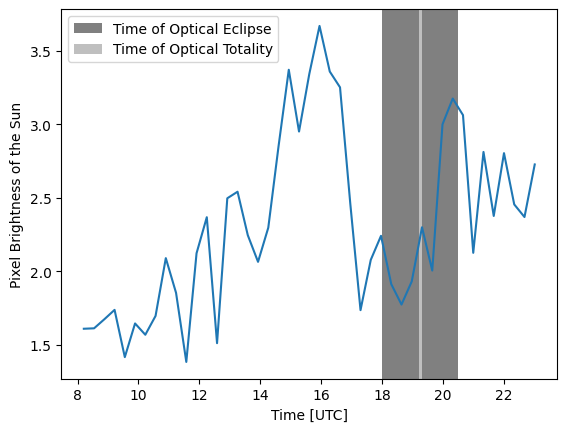

In [9]:
intensities = []
time = info_block.field(2)[0:45]

for i in range(0,45):

  x_sun_0 = info_block.field(9)[i]
  y_sun_0 = info_block.field(10)[i]
  intensities.append(image_block[i,0 , y_sun_0, x_sun_0])

plt.axvspan(18, 20.5, facecolor='0.5', label = "Time of Optical Eclipse")
plt.axvspan(19.23, 19.3, facecolor='0.75', label = "Time of Optical Totality")
plt.xlabel("Time [UTC]")
plt.ylabel("Pixel Brightness of the Sun")
plt.plot(time, intensities)
plt.legend()
plt.show()

Further work: complete this same processing for the other two days of data included in the drive. After you have successfully imported the data, can you make the same intensity plot of the sun as above, but include all three days of data to compare the behavior of the sun during the eclipse to that on a normal day?